
### MNIST PROJECT

In [22]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from sklearn.metrics import classification_report

In [2]:
# Load the mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

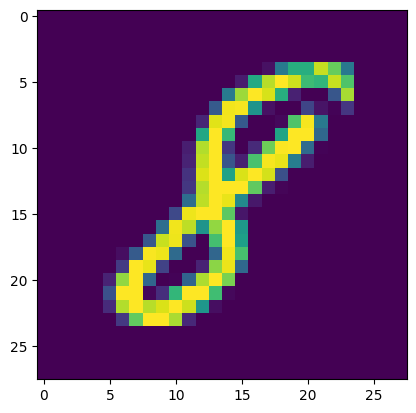

In [4]:
plt.imshow(x_train[7777])

In [5]:
# Normalize pixel values to range 0-1
# the pixel values in an image typically range from 0 to 255
# 1dividing all pixel values by 255 brings the pixel values to the range between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [6]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define data augmentation parameters for training set
train_datagen = ImageDataGenerator(
rotation_range=20, # Randomly rotate images up to 10 degrees
width_shift_range=0.1, # Randomly shift images horizontally up to 10% of the width
height_shift_range=0.1, # Randomly shift images vertically up to 10% of the height
horizontal_flip=True, # Randomly flip images horizontally
vertical_flip=False, # Don't randomly flip images vertically
shear_range=0.10, # crops part of the image
zoom_range=0.10 # #zooms the image by 10%
)


In [8]:
# Fit the transformation to the training dataset
train_datagen.fit(x_train)

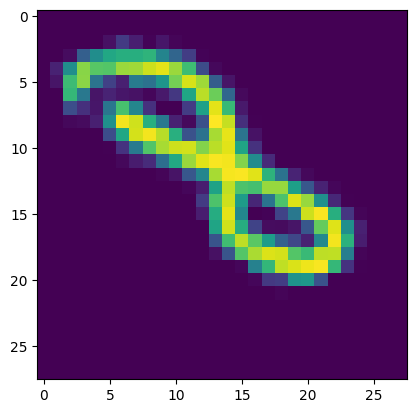

In [9]:
# showing sample of a transformation
plt.imshow(train_datagen.random_transform(x_train[7777]))

### MODELS ARCHITECTURE

In [10]:
#Import neccessary libraries for the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras import regularizers

#### Choice of optimizer

#### Adam

In [11]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'softmax'))

# print the summary of the model constructed
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [12]:
# Compile the model
model.compile(optimizer= Adam(learning_rate =0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=10, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/10
1875/1875 [==============================] - 64s 5ms/step - loss: 0.5580 - accuracy: 0.8172 - val_loss: 0.0875 - val_accuracy: 0.9731
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2210 - accuracy: 0.9340 - val_loss: 0.0619 - val_accuracy: 0.9804
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1697 - accuracy: 0.9492 - val_loss: 0.0575 - val_accuracy: 0.9817
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1448 - accuracy: 0.9565 - val_loss: 0.0535 - val_accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1323 - accuracy: 0.9608 - val_loss: 0.0522 - val_accuracy: 0.9823
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1180 - accuracy: 0.9645 - val_loss: 0.0445 - val_accuracy: 0.9864
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1114 - accuracy: 0.9672 - val_loss: 0.0433 - val_accuracy

<AxesSubplot:>

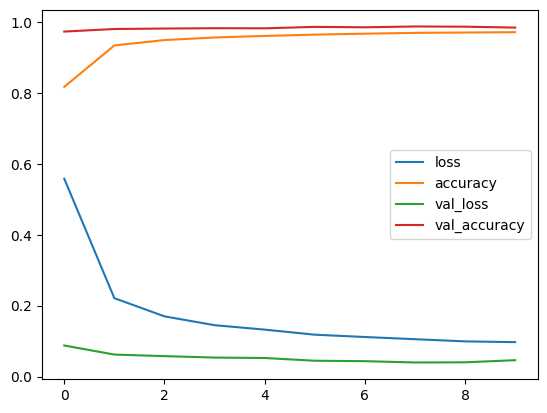

In [16]:
pd.DataFrame(history.history).plot()

In [17]:
y_pred = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 1s 3ms/step


In [18]:
model.predict(x_test).shape

313/313 [==============================] - 0s 2ms/step


(10000, 10)

In [23]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.99      0.99      0.99      1010
           4       0.97      1.00      0.99       982
           5       0.96      0.97      0.96       892
           6       0.98      0.98      0.98       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



#### SGD

In [24]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'softmax'))


# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 128)       

In [25]:
# Compile the model
model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])


In [26]:
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=10, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5201 - accuracy: 0.4708 - val_loss: 0.4450 - val_accuracy: 0.8633
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7054 - accuracy: 0.7651 - val_loss: 0.2569 - val_accuracy: 0.9201
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5301 - accuracy: 0.8266 - val_loss: 0.1965 - val_accuracy: 0.9388
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4245 - accuracy: 0.8646 - val_loss: 0.1495 - val_accuracy: 0.9514
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3615 - accuracy: 0.8878 - val_loss: 0.1049 - val_accuracy: 0.9663
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3170 - accuracy: 0.9021 - val_loss: 0.1005 - val_accuracy: 0.9655
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2807 - accuracy: 0.9123 - val_loss: 0.0902 - val_accuracy:

<AxesSubplot:>

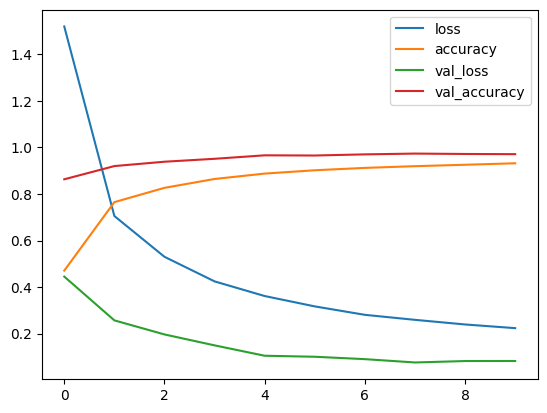

In [27]:
pd.DataFrame(history.history).plot()

In [28]:
y_pred = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 0s 1ms/step


In [29]:
model.predict(x_test).shape

313/313 [==============================] - 0s 1ms/step


(10000, 10)

In [30]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       980
           1       1.00      0.98      0.99      1135
           2       0.93      0.97      0.95      1032
           3       0.96      0.99      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.96      0.93      0.95       892
           6       0.99      0.97      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.95      0.99      0.97       974
           9       0.96      0.97      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



#### RMSprop

In [31]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'softmax'))


# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 128)       

In [33]:
model.compile(optimizer= RMSprop(learning_rate=0.001,rho=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=10, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5374 - accuracy: 0.8248 - val_loss: 0.0992 - val_accuracy: 0.9689
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2114 - accuracy: 0.9383 - val_loss: 0.0702 - val_accuracy: 0.9788
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1802 - accuracy: 0.9490 - val_loss: 0.1000 - val_accuracy: 0.9770
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1849 - accuracy: 0.9496 - val_loss: 0.0782 - val_accuracy: 0.9814
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2020 - accuracy: 0.9467 - val_loss: 0.1623 - val_accuracy: 0.9705
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2054 - accuracy: 0.9456 - val_loss: 0.0916 - val_accuracy: 0.9796
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2065 - accuracy: 0.9459 - val_loss: 0.1609 - val_accuracy

<AxesSubplot:>

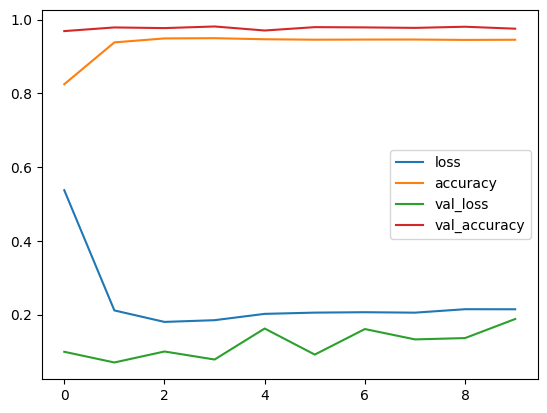

In [35]:
pd.DataFrame(history.history).plot()

In [36]:
y_pred = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 1s 2ms/step


In [37]:
model.predict(x_test).shape

313/313 [==============================] - 0s 1ms/step


(10000, 10)

In [38]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       980
           1       1.00      0.97      0.99      1135
           2       0.92      0.98      0.95      1032
           3       0.99      0.97      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.98      0.96      0.97       892
           6       0.98      0.94      0.96       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



##### Regularizers

##### L1

In [39]:
# Example CNN architecture with L1 regularization
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Print the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 2, 2, 128)       

In [40]:
# Compile the model
model.compile(optimizer= Adam(learning_rate =0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=10, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.9927 - accuracy: 0.7763 - val_loss: 0.4375 - val_accuracy: 0.9325
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5616 - accuracy: 0.8929 - val_loss: 0.3894 - val_accuracy: 0.9388
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4715 - accuracy: 0.9111 - val_loss: 0.3013 - val_accuracy: 0.9604
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4192 - accuracy: 0.9222 - val_loss: 0.2703 - val_accuracy: 0.9645
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3908 - accuracy: 0.9285 - val_loss: 0.2832 - val_accuracy: 0.9598
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3682 - accuracy: 0.9348 - val_loss: 0.2463 - val_accuracy: 0.9705
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3576 - accuracy: 0.9351 - val_loss: 0.2521 - val_accuracy:

<AxesSubplot:>

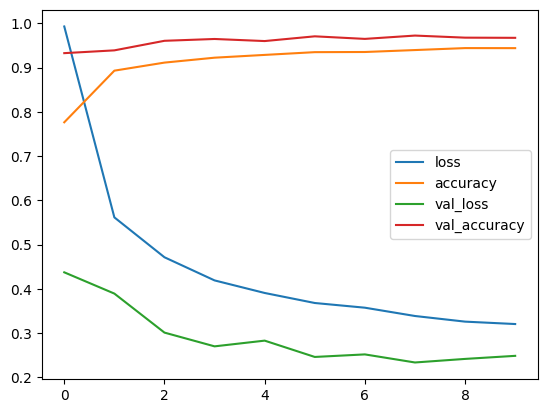

In [42]:
pd.DataFrame(history.history).plot()

In [43]:
y_pred = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 0s 1ms/step


In [44]:
model.predict(x_test).shape

313/313 [==============================] - 0s 1ms/step


(10000, 10)

In [45]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.97      0.91      0.94      1032
           3       0.93      0.98      0.96      1010
           4       0.97      0.98      0.98       982
           5       0.94      0.95      0.95       892
           6       0.97      0.96      0.97       958
           7       0.97      0.98      0.97      1028
           8       0.95      0.97      0.96       974
           9       0.99      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



##### L2

In [46]:
# Example CNN architecture with L2 regularization
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Print the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 2, 2, 128)       

In [47]:
# Compile the model
model.compile(optimizer=Adam(learning_rate =0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=10, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5368 - accuracy: 0.8627 - val_loss: 0.2072 - val_accuracy: 0.9696
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2806 - accuracy: 0.9448 - val_loss: 0.1778 - val_accuracy: 0.9726
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2393 - accuracy: 0.9532 - val_loss: 0.1695 - val_accuracy: 0.9718
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2153 - accuracy: 0.9588 - val_loss: 0.1322 - val_accuracy: 0.9827
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1996 - accuracy: 0.9624 - val_loss: 0.1583 - val_accuracy: 0.9729
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1875 - accuracy: 0.9639 - val_loss: 0.1452 - val_accuracy: 0.9761
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1754 - accuracy: 0.9669 - val_loss: 0.1342 - val_accuracy:

<AxesSubplot:>

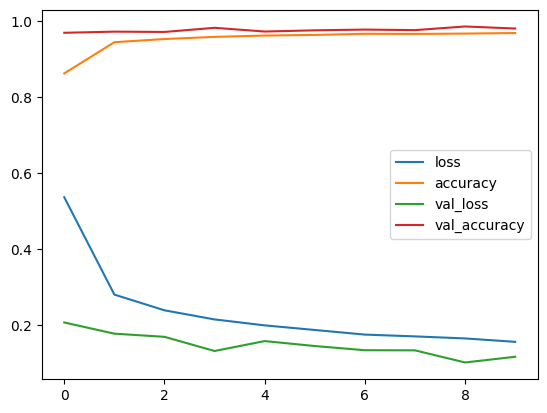

In [49]:
pd.DataFrame(history.history).plot()

In [50]:
y_pred = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 0s 1ms/step


In [51]:
model.predict(x_test).shape

313/313 [==============================] - 0s 1ms/step


(10000, 10)

In [52]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.95      0.98      0.97      1032
           3       0.95      1.00      0.97      1010
           4       0.99      1.00      0.99       982
           5       0.97      0.97      0.97       892
           6       0.98      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8       1.00      0.97      0.98       974
           9       1.00      0.96      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



##### Batch Normalization

In [53]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

# Print the model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 2, 2, 128)       

In [54]:
# Compile the model
model.compile(optimizer=Adam(learning_rate =0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=10, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2711 - accuracy: 0.9126 - val_loss: 0.1303 - val_accuracy: 0.9592
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1278 - accuracy: 0.9598 - val_loss: 0.0873 - val_accuracy: 0.9757
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1056 - accuracy: 0.9667 - val_loss: 0.0679 - val_accuracy: 0.9797
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0950 - accuracy: 0.9704 - val_loss: 0.0813 - val_accuracy: 0.9740
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0869 - accuracy: 0.9729 - val_loss: 0.0531 - val_accuracy: 0.9851
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0813 - accuracy: 0.9735 - val_loss: 0.0678 - val_accuracy: 0.9785
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0739 - accuracy: 0.9772 - val_loss: 0.0552 - val_accuracy:

<AxesSubplot:>

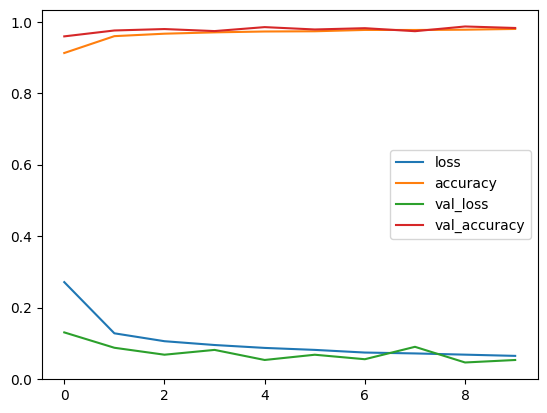

In [56]:
pd.DataFrame(history.history).plot()

In [57]:
y_pred = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 0s 915us/step


In [58]:
model.predict(x_test).shape

313/313 [==============================] - 0s 919us/step


(10000, 10)

In [59]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.94      0.98      0.96      1032
           3       1.00      0.97      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.96      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.99      0.97      0.98      1028
           8       1.00      0.99      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### changes to the number of convolution blocks

In [60]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'softmax'))


# Print the model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 6272)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               802944    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                      

In [61]:
# Compile the model
model.compile(optimizer=Adam(learning_rate =0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [62]:
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=10, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8840 - accuracy: 0.7000 - val_loss: 0.2460 - val_accuracy: 0.9175
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5890 - accuracy: 0.8060 - val_loss: 0.1836 - val_accuracy: 0.9345
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5088 - accuracy: 0.8337 - val_loss: 0.1487 - val_accuracy: 0.9538
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4541 - accuracy: 0.8527 - val_loss: 0.1635 - val_accuracy: 0.9463
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4200 - accuracy: 0.8649 - val_loss: 0.1158 - val_accuracy: 0.9637
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3871 - accuracy: 0.8772 - val_loss: 0.1093 - val_accuracy: 0.9650
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3664 - accuracy: 0.8833 - val_loss: 0.0832 - val_accuracy:

<AxesSubplot:>

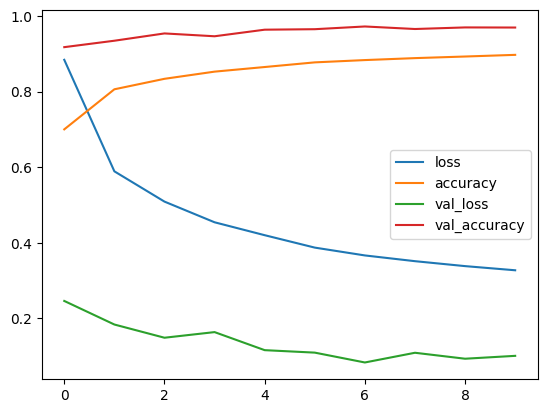

In [63]:
pd.DataFrame(history.history).plot()

In [64]:
y_pred = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 0s 713us/step


In [65]:
model.predict(x_test).shape

313/313 [==============================] - 0s 725us/step


(10000, 10)

In [66]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.98      0.99      1135
           2       0.94      0.94      0.94      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.95      0.94      0.95       892
           6       0.97      0.96      0.97       958
           7       0.98      0.95      0.97      1028
           8       0.96      0.98      0.97       974
           9       0.95      0.98      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [67]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'softmax'))


# Print the model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 2304)              0         
                                                                 
 dense_14 (Dense)            (None, 128)              

In [68]:
# Compile the model
model.compile(optimizer=Adam(learning_rate =0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [69]:
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=10, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6557 - accuracy: 0.7818 - val_loss: 0.1326 - val_accuracy: 0.9565
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3256 - accuracy: 0.8995 - val_loss: 0.0743 - val_accuracy: 0.9744
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2516 - accuracy: 0.9230 - val_loss: 0.0635 - val_accuracy: 0.9791
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2153 - accuracy: 0.9343 - val_loss: 0.0561 - val_accuracy: 0.9819
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1901 - accuracy: 0.9425 - val_loss: 0.0482 - val_accuracy: 0.9823
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1779 - accuracy: 0.9450 - val_loss: 0.0498 - val_accuracy: 0.9827
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1677 - accuracy: 0.9489 - val_loss: 0.0448 - val_accuracy:

<AxesSubplot:>

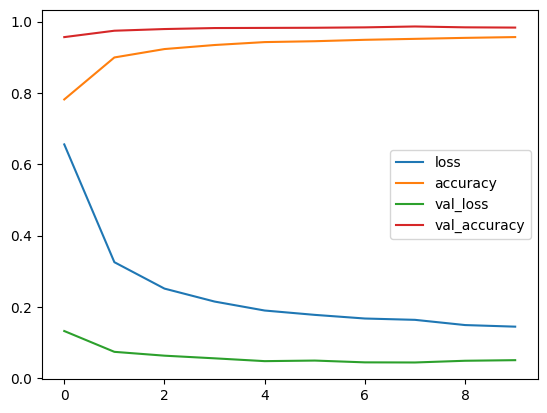

In [70]:
pd.DataFrame(history.history).plot()

In [71]:
y_pred = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 0s 1ms/step


In [72]:
model.predict(x_test).shape

313/313 [==============================] - 0s 1ms/step


(10000, 10)

In [73]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.96      0.97      0.96      1032
           3       0.99      1.00      0.99      1010
           4       0.97      1.00      0.98       982
           5       0.96      0.97      0.97       892
           6       0.98      0.97      0.97       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



#### Learning Rate

In [81]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'softmax'))

# print the summary of the model constructed
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 2, 2, 128)       

In [82]:
model.compile(optimizer=Adam(learning_rate =0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [83]:
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=10, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1269 - accuracy: 0.6169 - val_loss: 0.3376 - val_accuracy: 0.8843
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6000 - accuracy: 0.8042 - val_loss: 0.2020 - val_accuracy: 0.9345
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4595 - accuracy: 0.8523 - val_loss: 0.1486 - val_accuracy: 0.9520
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3854 - accuracy: 0.8797 - val_loss: 0.1281 - val_accuracy: 0.9606
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3277 - accuracy: 0.8983 - val_loss: 0.1000 - val_accuracy: 0.9675
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2941 - accuracy: 0.9100 - val_loss: 0.0830 - val_accuracy: 0.9716
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2662 - accuracy: 0.9184 - val_loss: 0.0775 - val_accuracy:

<AxesSubplot:>

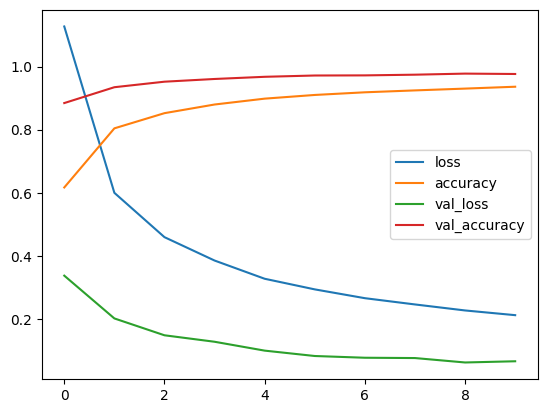

In [84]:
pd.DataFrame(history.history).plot()

In [85]:
y_pred = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 1s 2ms/step


In [86]:
model.predict(x_test).shape

313/313 [==============================] - 0s 2ms/step


(10000, 10)

In [87]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.97      0.93      0.95      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.95      0.96      0.95       892
           6       0.97      0.97      0.97       958
           7       0.97      0.97      0.97      1028
           8       0.98      0.99      0.98       974
           9       0.96      0.99      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [88]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'softmax'))

# print the summary of the model constructed
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 2, 2, 128)      

In [89]:
model.compile(optimizer=Adam(learning_rate =0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

In [90]:
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=10, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6640 - accuracy: 0.7788 - val_loss: 0.1137 - val_accuracy: 0.9622
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2804 - accuracy: 0.9153 - val_loss: 0.0698 - val_accuracy: 0.9774
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2047 - accuracy: 0.9372 - val_loss: 0.0663 - val_accuracy: 0.9772
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1726 - accuracy: 0.9482 - val_loss: 0.0577 - val_accuracy: 0.9817
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1537 - accuracy: 0.9539 - val_loss: 0.0479 - val_accuracy: 0.9835
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1341 - accuracy: 0.9591 - val_loss: 0.0467 - val_accuracy: 0.9842
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1239 - accuracy: 0.9628 - val_loss: 0.0538 - val_accuracy:

<AxesSubplot:>

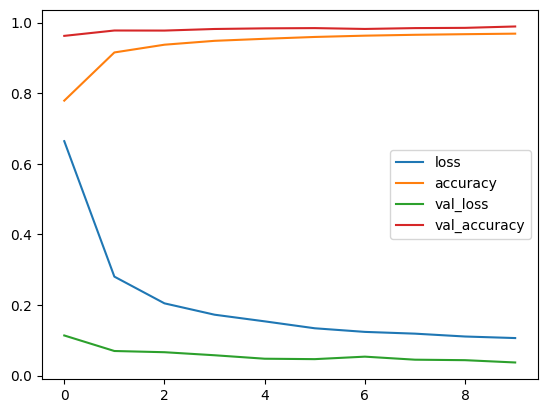

In [91]:
pd.DataFrame(history.history).plot()

In [92]:
y_pred = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 0s 957us/step


In [93]:
model.predict(x_test).shape

313/313 [==============================] - 1s 3ms/step


(10000, 10)

In [94]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.98      0.98      0.98      1032
           3       0.99      1.00      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

